### The dataset here contains the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). A linear regression model is build for predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share.

In [95]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
import colorama
from colorama import Fore

#print(Fore.RED + 'This text is red in color')


# Importing data

In [98]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cubic_zirconia.csv")  

# EDA

In [44]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [45]:
# Dropping the first column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Data Dictionary 

In [88]:
data_dict=pd.read_excel("Data_Dictionary.xlsx")
data_dict

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,Clarity refers to the absence of the Inclusion...
4,Depth,"The Height of cubic zirconia, measured from t..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


### Inspect Dataframes 

In [89]:
#dataset dimension
print(" Dataset dimension :",df.shape)

#dataset size
print(" Size of the dataset :",df.size)

 Dataset dimension : (26967, 10)
 Size of the dataset : 269670


In [90]:
#check datatype of variables
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [91]:
#check null values
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [92]:
#check missing values
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth       True
table      False
x          False
y          False
z          False
price      False
dtype: bool

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


## <span style='color:Green'>Insights  </span>

- The dataset contains total 26967 rows and 10 columns
- There are 6 float, 1 integer and 3 object columns.
- Only depth column has missing values.


In [94]:
#check duplicates in the dataset if any
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [99]:
#drop duplicate rows
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 11)
After (26967, 11)


In [96]:
#checking duplicates after dropping
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Unique values for categorical variables

In [97]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




- There are 5 unique categories under 'cut'column namely 'Fair','Good','Very Good','Premium' and 'Ideal'.The column contains large number of 'Ideal' type stones.
- Column 'color' contains 7 subcategories.It contains more number of worst quality stones than best ones.
- 'clarity' column has 8 unique sublevels.

In [17]:
#check statistical summary
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### <span style='color:Green'>Insights  </span>

- Cubic zirconia has minimum of 0.20 carat and is maximum of 4.5 carat.
- It is of average height of 61.
- Most of the stones come with length of 5 mm and the it has maximum length upto 10 mm.
- Average width and height of zirconia is 5 mm and 3 mm respectively.
- The stone price starts from 326 and it is upto 18818.

### Univariate Analysis

Univariate analysis is the simplest analysis where the data is analyzed only on one variable.

The most common univariate analysis is checking the central tendency (mean, median and mode), the range, the maximum and minimum values, and standard deviation of a variable.

Common visual technique used for univariate analysis is a histogram, which is a frequency distribution graph.

A box plot can also be used to compare the spread of the variables and provides an insight into outliers.

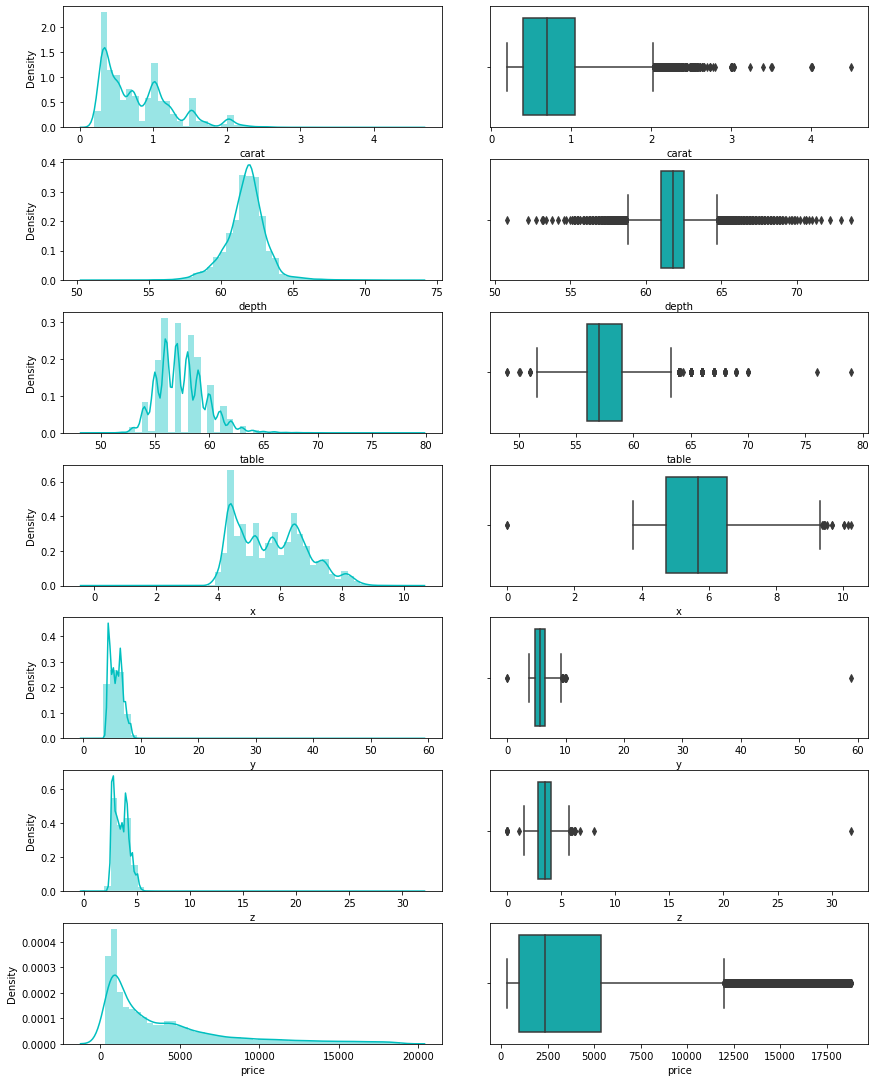

In [18]:
# construct histogram and box plot for continuous variables
fig,ax = plt.subplots(nrows=7, ncols=2, figsize= (12,15))
fig.tight_layout()

sns.distplot(df['carat'], ax = ax[0][0],color='c')
sns.boxplot(df['carat'], ax = ax[0][1],color='c')


sns.distplot(df['depth'], ax = ax[1][0],color='c')
sns.boxplot(df['depth'], ax = ax[1][1],color='c')


sns.distplot(df['table'], ax = ax[2][0],color='c')
sns.boxplot(df['table'], ax = ax[2][1],color='c')


sns.distplot(df['x'], ax = ax[3][0],color='c')
sns.boxplot(df['x'], ax = ax[3][1],color='c');

sns.distplot(df['y'], ax = ax[4][0],color='c')
sns.boxplot(df['y'], ax = ax[4][1],color='c');

sns.distplot(df['z'], ax = ax[5][0],color='c')
sns.boxplot(df['z'], ax = ax[5][1],color='c');

sns.distplot(df['price'], ax = ax[6][0],color='c')
sns.boxplot(df['price'], ax = ax[6][1],color='c');

- 'depth' column is normally distributed and rest all are right skewed except 'density' is left skewed.
- Almost all columns have good amount of outliers.

In [100]:
# Copy all the continuous variables into a new dataframe
df_cont = df.drop(['cut','clarity','color'], axis=1)

In [101]:
df_cont.head()

,Unnamed: 0,carat,depth,table,x,y,z,price
0,1,0.30,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,60.4,59.0,4.35,4.43,2.65,779


In [102]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [103]:
for column in df_cont.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

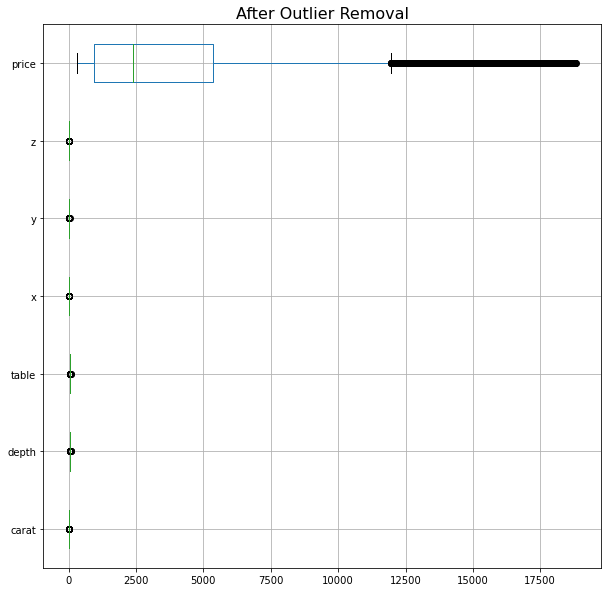

In [102]:
plt.figure(figsize=(10,10))
df_cont.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

- 'Price' column still have outliers.
- Outliers were treated for rest of the columns.

### Bivariate Analysis

Bivariate analysis is where you are comparing two variables to study their relationships. These variables could be dependent or independent to each other. In Bivariate analysis is that there is always a Y-value for each X-value.

The most common visual technique for bivariate analysis is a scatter plot, where one variable is on the x-axis and the other on the y-axis.

### Correlation

In [275]:
#checking correlation between variables
corr=df.corr()
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.033371,0.187143,0.982387,0.981464,0.977508,0.936762
depth,0.033371,1.000000,-0.294181,-0.018625,-0.022301,0.101901,0.000094
table,0.187143,-0.294181,1.000000,0.199061,0.193428,0.159380,0.137880
x,0.982387,-0.018625,0.199061,1.000000,0.998491,0.988168,0.912933
y,0.981464,-0.022301,0.193428,0.998491,1.000000,0.987841,0.914361
z,0.977508,0.101901,0.159380,0.988168,0.987841,1.000000,0.905866
price,0.936762,0.000094,0.137880,0.912933,0.914361,0.905866,1.000000


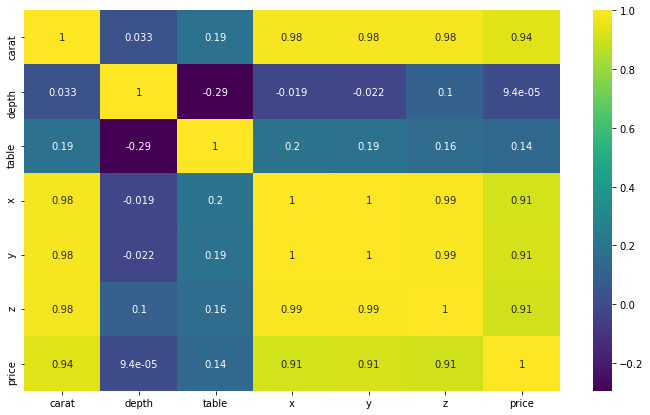

In [276]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

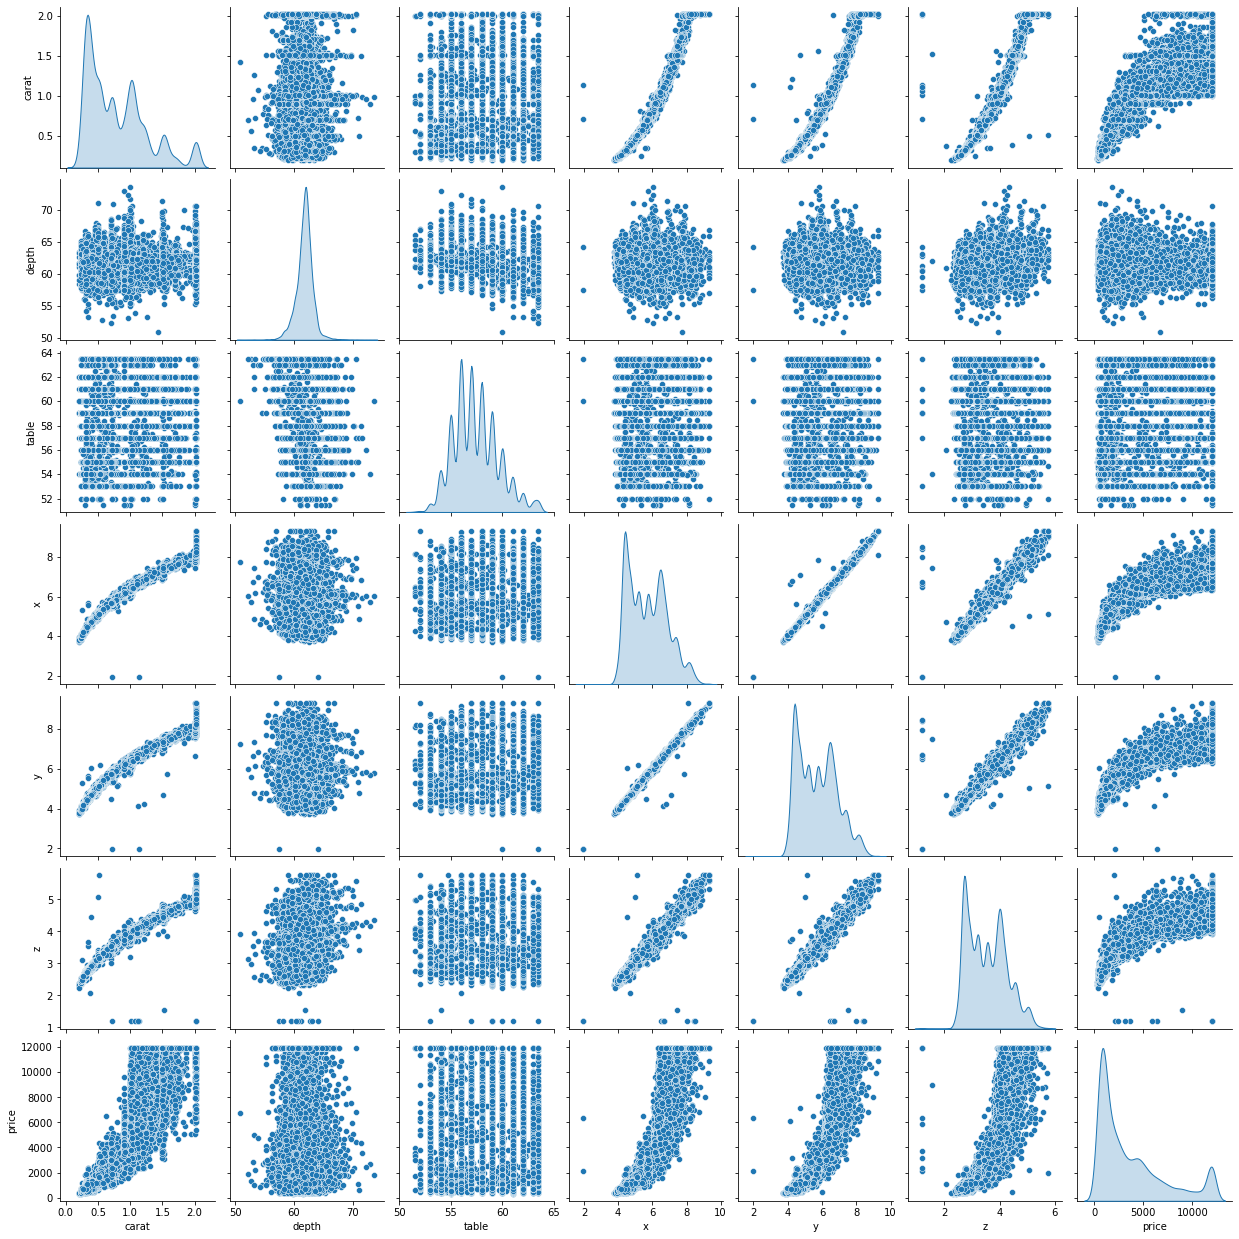

In [277]:
sns.pairplot(df, diag_kind='kde')

- <span style='color:Green'>Price of cubic zirconia is highly correlated to its weight and size that is length,width,height </span>

- <span style='color:Green'>carat weight of the stone has linear relation with its length,width and height  </span>

- <span style='color:Green'>Length and width of the stone are linearly dependent. </span>

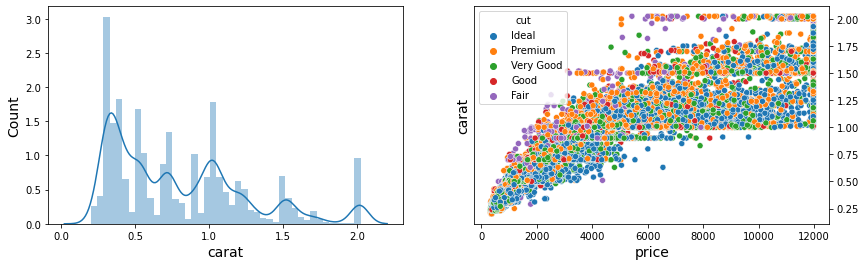

In [278]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['carat'], ax = axes[0])
axes[0].set_xlabel('carat', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'price', y = 'carat', data = df, hue = 'cut', ax = axes[1])
axes[1].set_xlabel('price', fontsize=14)
axes[1].set_ylabel('carat', fontsize=14)
axes[1].yaxis.tick_right()

plt.show()

In [17]:
df[df['carat']>1.0].count()

Unnamed: 0    8804
carat         8804
cut           8804
color         8804
clarity       8804
depth         8575
table         8804
x             8804
y             8804
z             8804
price         8804
dtype: int64

<AxesSubplot:xlabel='cut', ylabel='count'>

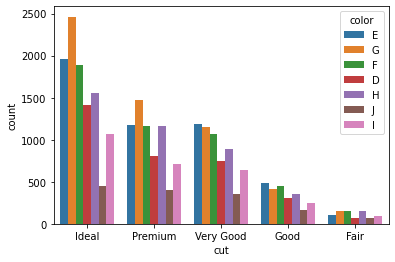

In [23]:
sns.countplot(x=df['cut'],hue=df['color'])

<AxesSubplot:xlabel='color', ylabel='count'>

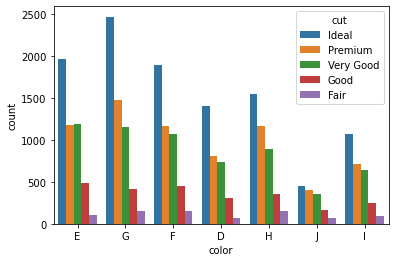

In [8]:
sns.countplot(x=df['color'],hue=df['cut'])

<AxesSubplot:xlabel='color', ylabel='count'>

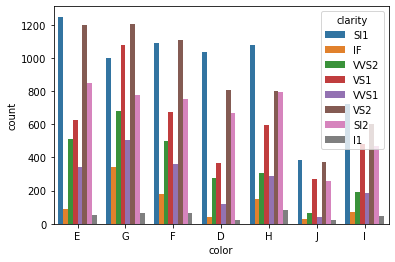

In [24]:
sns.countplot(x=df['color'],hue=df['clarity'])

In [279]:
df["cut"].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [280]:
df["color"].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

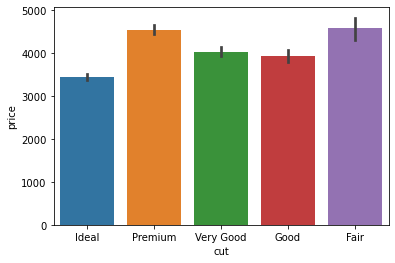

In [9]:
#from numpy import median
ax = sns.barplot(x="cut", y="price", data=df)

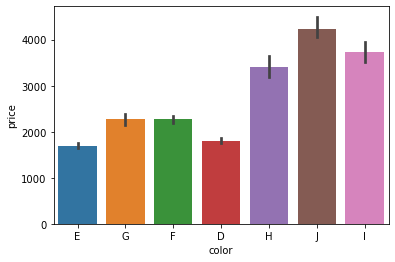

In [282]:
ax = sns.barplot(x="color", y="price", data=df, estimator=median)

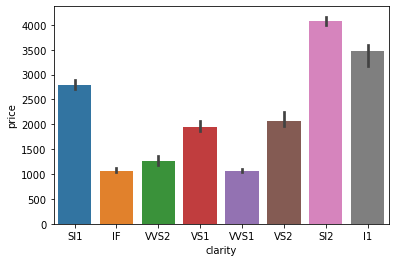

In [283]:
ax = sns.barplot(x="clarity", y="price", data=df, estimator=median)

## <span style='color:Green'>Insights  </span>

- Cubic zirconia that weighs less than a carat comes witha a range of price of 326 to 5000 rupees and if the weight is in between one and two carat, it comes with a price range of 5500 to 12000.
- The best stone cut is 'Ideal' cut but ideal cut stones have less number of good color.
- With a price of 4000 to 4500 one can get best colored stone.
- Best clarity stones comes with an average price of 3000 to 3500.

### Checking for null values,values which are equal to zero.Checking for the possibility of combining the sub levels of a ordinal variables and takeing actions accordingly.

In [30]:
#check for missing values
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth       True
table      False
x          False
y          False
z          False
price      False
dtype: bool

### Only depth column has missing values

In [31]:
df[df.isnull().any(axis=1)]['depth']

26      NaN
86      NaN
117     NaN
148     NaN
163     NaN
         ..
26848   NaN
26854   NaN
26879   NaN
26923   NaN
26960   NaN
Name: depth, Length: 697, dtype: float64

In [103]:
#instead of dropping the rows, lets replace the missing values with median value. 
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [104]:
df = df.replace('?', np.nan)

In [105]:
# replace the missing values in 'depth' with median value of 'depth'
df['depth'] = df['depth'].fillna(df.depth.median())

In [54]:
#check for null values after imputing in 'depth'
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price


### no missing values in the dataset now.

In [36]:
#check for zero va;lues in the dataset
df.eq(0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

### There are 2 entries where length of stone is zero,2 has width  zero and there are 8 entries which has height equals to zero.

In [37]:
#check entries have length zero
df[df['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [38]:
#check entries of width zero
df[df['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [39]:
#find entries have height zero
df[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### Row number 5821 and 17506 have all the three enrtries length,width and height as zero.As the number is very less these two rows can be dropped.

### But rest 6 entries which have length and width value but zero height value cannot be dropped because these stones are of premium quality with good clarity and color. Hence dropping these rows will cause information loss.

### So missing 'z' values can be imputed for these 6 rows. As this column is a bit right skewed, it will be better if the missing values will be replaced by the median value instead of mean.

In [106]:
#median of height column
median=df['z'].median()
median

3.52

In [107]:
#replace null values of 'z'with median of premium quality 'z'.
df['z'] = df['z'].fillna(median)

In [108]:
#check for null values after imputing
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

### There is no null entries in the data set now. 

In [44]:
#check for sublevels of categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




- For 'cut' column, sublevels Fair and Good can be merged because the numbers are very less as compared to other sublevels and it will not make much effect if we combine them.
- For 'clarity' column 'IF' is the worst kind of stones.But 'VVS1' and 'VVS2' can be combined together and can be make it as one category.


In [109]:
#combining 'Fair'and 'Good'
df['cut']=np.where(df['cut'] =='Fair', 'Good', df['cut'])

In [110]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          3222
Name: cut, dtype: int64

In [111]:
df['clarity']=np.where(df['clarity'] =='VVS1', 'VVS2', df['clarity'])

In [61]:
df['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VVS2    4369
VS1     4087
IF       891
I1       364
Name: clarity, dtype: int64

## Encoding the data for Modelling and splitting the data into train and test. 

### Converting categorical to dummy variables

In [112]:
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'],drop_first=True)
df.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Ideal,cut_Premium,...,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2
0,1.0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,3.0,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5.0,0.31,60.4,59.0,4.35,4.43,2.65,779.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
#dataset dimension
print(" Dataset dimension :",df.shape)

 Dataset dimension : (26933, 22)


## Train-Test Split

In [113]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [116]:
df.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS2'],
      dtype='object')

In [117]:
X.head()

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [65]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',18853+8080)

X_train (18853, 21)
X_test (8080, 21)
y_train (18853, 1)
y_test (8080, 1)
Total Obs 26933


## Linear Regression Model

In [66]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    

The coefficient for carat is 9135.04454873907
The coefficient for depth is -26.730191696676457
The coefficient for table is -21.886777657720828
The coefficient for x is -1439.2793074119822
The coefficient for y is 1056.4764193027777
The coefficient for z is -122.63796859588467
The coefficient for cut_Ideal is 322.848158961341
The coefficient for cut_Premium is 298.5875103236701
The coefficient for cut_Very Good is 218.01357862973
The coefficient for color_E is -180.7455654423023
The coefficient for color_F is -259.25571235339584
The coefficient for color_G is -429.6130572964642
The coefficient for color_H is -855.8460444819675
The coefficient for color_I is -1323.7960660477486
The coefficient for color_J is -1932.1688253516577
The coefficient for clarity_IF is 4055.513601845183
The coefficient for clarity_SI1 is 2580.536533555773
The coefficient for clarity_SI2 is 1739.4766848199736
The coefficient for clarity_VS1 is 3398.8153160322445
The coefficient for clarity_VS2 is 3097.8992261772

In [68]:
#create a feature importance array of model coefficients
importance=[]
i=0
for column in X.columns:
    if i < 21:
        importance.append(regression_model.coef_[0][i])
        i = i+1
importance

[9135.04454873907,
 -26.730191696676457,
 -21.886777657720828,
 -1439.2793074119822,
 1056.4764193027777,
 -122.63796859588467,
 322.848158961341,
 298.5875103236701,
 218.01357862973,
 -180.7455654423023,
 -259.25571235339584,
 -429.6130572964642,
 -855.8460444819675,
 -1323.7960660477486,
 -1932.1688253516577,
 4055.513601845183,
 2580.536533555773,
 1739.4766848199736,
 3398.8153160322445,
 3097.8992261772632,
 3818.7325910408217]

In [69]:
#Create arrays from feature importance and feature names
feature_importance = np.array(importance)
feature_names = np.array(X_train.columns)

Text(0, 0.5, 'FEATURE NAMES')

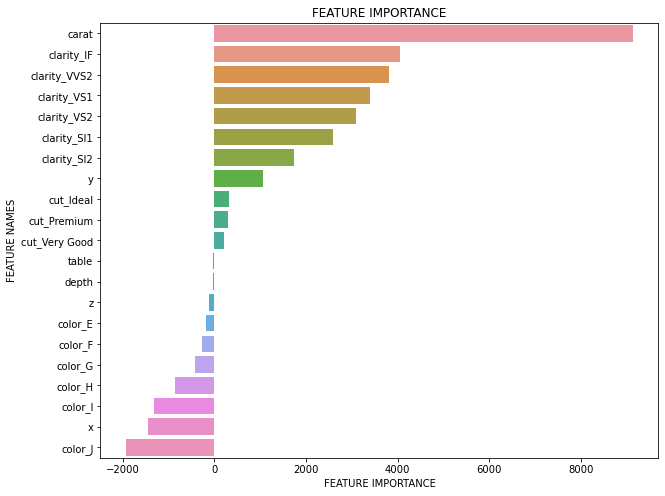

In [70]:
#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [71]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -585.5562139005233


###  R-square calculation 

In [72]:
# R square on training data
linear_rsq_train=regression_model.score(X_train, y_train)
linear_rsq_train

0.939855175023037

In [73]:
# R square on testing data
linear_rsq_test=regression_model.score(X_test, y_test)
linear_rsq_test

0.9418151218918173

### 93% of the variation in the price is explained by the predictors in the model for train set and 94% explained for test set.

### Adjusted R-square calculation

In [74]:
#display adjusted R-squared for train data
linear_adj_rsq_train=1 - (1-regression_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
linear_adj_rsq_train

0.939788102572051

In [75]:
#display adjusted R-squared for train data
linear_adj_rsq_test=1 - (1-regression_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
linear_adj_rsq_test

0.9416634859473805

### Calculating RMSE 

#### Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [76]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
linear_rmse_train=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
linear_rmse_train

849.9275177772696

In [77]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
linear_rmse_test=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
linear_rmse_test

837.9796268535508

In [131]:
df.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS2'],
      dtype='object')

In [50]:
# # initialise data of lists.
# data = {"EVALUATION METRICS":['R-sq_Train', 'R-sq_Test', 'Adj_R-sq_Train', 'Adj_R-sq_Test','RMSE_Train','RMSE_Test'], 'SCORE':[0.939,0.941,0.939,0.941,849.92,0.241]}

# # Create DataFrame
# score_df = pd.DataFrame(data)

# # Print the output.
# print(score_df)

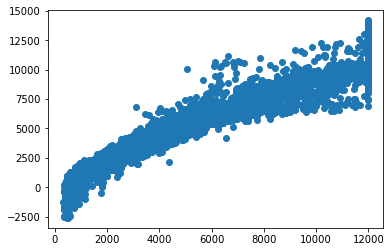

In [132]:
plt.scatter(y_test['price'], predicted_test)
plt.show()

In [120]:
print("R squared score(Train):",linear_rsq_train)
print("R squared score(Test):",linear_rsq_test)
print("Adjusted R squared score(Train):",linear_adj_rsq_train)
print("Adjusted R squared score(Test):",linear_adj_rsq_test)
print("RMSE(Train):",linear_rmse_train)
print("RMSE(Test):",linear_rmse_test)

R squared score(Train): 0.939855175023037
R squared score(Test): 0.9418151218918173
Adjusted R squared score(Train): 0.939788102572051
Adjusted R squared score(Test): 0.9416634859473805
RMSE(Train): 849.9275177772696
RMSE(Test): 837.9796268535508


## Ridge regression

In [78]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [79]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

### Create a regularized RIDGE model 

In [81]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[ 1.21647729 -0.01074759 -0.01363206 -0.46155203  0.33555197 -0.02465249
   0.0456325   0.03749033  0.02625747 -0.02012538 -0.02842459 -0.05043871
  -0.08859882 -0.11583156 -0.12530825  0.20903323  0.31916176  0.18789839
   0.35135653  0.3734373   0.40567966]]


In [82]:
#create a feature importance array of model coefficients
importance=[]
i=0
for column in X.columns:
    if i < 21:
        importance.append(ridge.coef_[0][i])
        i = i+1
importance

[1.2164772872473264,
 -0.010747586179415734,
 -0.013632060042411874,
 -0.46155203107556203,
 0.33555197033734063,
 -0.024652488738238873,
 0.04563250216565927,
 0.03749032923177244,
 0.026257468919625476,
 -0.020125379292024792,
 -0.028424585762841622,
 -0.05043870745885213,
 -0.08859882388228686,
 -0.11583156283134458,
 -0.12530824864323659,
 0.20903323231830745,
 0.3191617648883267,
 0.18789838575911816,
 0.3513565294128901,
 0.373437299800456,
 0.40567965947227463]

In [83]:
#Create arrays from feature importance and feature names
feature_importance = np.array(importance)
feature_names = np.array(X_train.columns)

Text(0, 0.5, 'FEATURE NAMES')

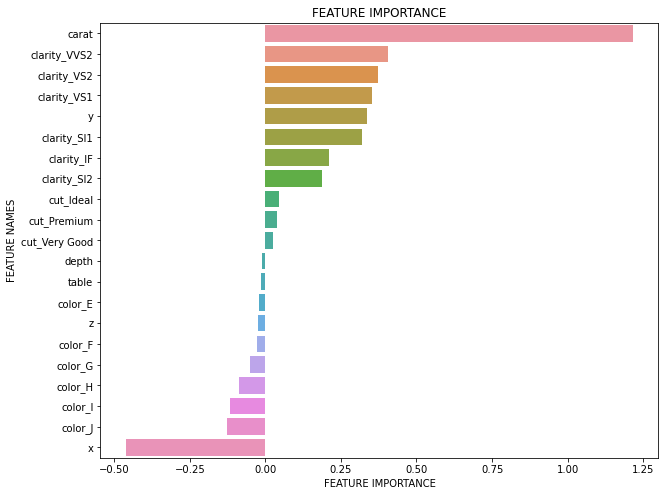

In [84]:
#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

#### Ridge regression model score

In [85]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9398550836349612
0.9418131974305908


In [86]:
# R square on training data
ridge_rsq_train=ridge.score(X_train, y_train)
ridge_rsq_train

# R square on testing data
ridge_rsq_test=ridge.score(X_test, y_test)
ridge_rsq_test

print('Rsquare_(train): ', ridge_rsq_train)
print('Rsquare_(test): ', ridge_rsq_test)

### Adjusted R-square calculation

#display adjusted R-squared for train data
ridge_adj_rsq_train=1 - (1-ridge.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
ridge_adj_rsq_train

#display adjusted R-squared for train data
ridge_adj_rsq_test=1 - (1-ridge.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
ridge_adj_rsq_test

print('AdjRsquare_(train): ',ridge_adj_rsq_train)
print('AdjRsquare_(test): ', ridge_adj_rsq_test)


### Calculating RMSE 

#### Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

#RMSE on Training data
predicted_train=ridge.fit(X_train, y_train).predict(X_train)
ridge_rmse_train=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
ridge_rmse_train

#RMSE on Testing data
predicted_test=ridge.fit(X_train, y_train).predict(X_test)
ridge_rmse_test=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
ridge_rmse_test

print('RMSE_(train): ', ridge_rmse_train)
print('RMSE_(test): ', ridge_rmse_test)


Rsquare_(train):  0.9398550836349612
Rsquare_(test):  0.9418131974305908
AdjRsquare_(train):  0.9397880110820609
AdjRsquare_(test):  0.9416615564708045
RMSE_(train):  0.2450672219419023
RMSE_(test):  0.24162599163793896


## Lasso regression 

In [87]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.83844037 -0.         -0.          0.          0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.          0.          0.        ]


In [88]:
#create a feature importance array of model coefficients
importance=[]
i=0
for column in X.columns:
    if i < 22:
        importance.append(lasso.coef_[i])
        i = i+1
importance

[0.8384403680508205,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0]

In [89]:
#Create arrays from feature importance and feature names
feature_importance = np.array(importance)
feature_names = np.array(X_train.columns)

Text(0, 0.5, 'FEATURE NAMES')

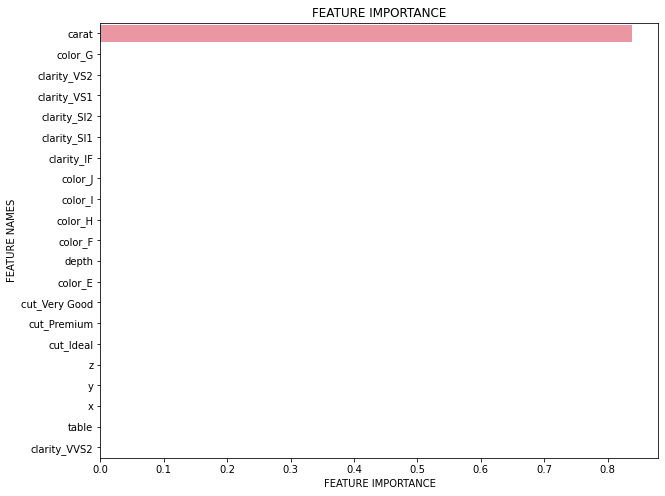

In [90]:
#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [91]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8658516458943666
0.8725033032924041


In [92]:
# R square on training data
lasso_rsq_train=lasso.score(X_train, y_train)
lasso_rsq_train

# R square on testing data
lasso_rsq_test=lasso.score(X_test, y_test)
lasso_rsq_test

print('Rsquare_(train): ', lasso_rsq_train)
print('Rsquare_(test): ', lasso_rsq_test)

### Adjusted R-square calculation

#display adjusted R-squared for train data
lasso_adj_rsq_train=1 - (1-lasso.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
lasso_adj_rsq_train

#display adjusted R-squared for train data
lasso_adj_rsq_test=1 - (1-lasso.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
lasso_adj_rsq_test

print('AdjRsquare_(train): ',lasso_adj_rsq_train)
print('AdjRsquare_(test): ', lasso_adj_rsq_test)


### Calculating RMSE 

#### Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

#RMSE on Training data
predicted_train=lasso.fit(X_train, y_train).predict(X_train)
lasso_rmse_train=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
lasso_rmse_train

#RMSE on Testing data
predicted_test=lasso.fit(X_train, y_train).predict(X_test)
lasso_rmse_test=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
lasso_rmse_test

print('RMSE_(train): ', lasso_rmse_train)
print('RMSE_(test): ', lasso_rmse_test)


Rsquare_(train):  0.8658516458943666
Rsquare_(test):  0.8725033032924041
AdjRsquare_(train):  0.8657020460092719
AdjRsquare_(test):  0.8721710334201207
RMSE_(train):  0.3659977700441695
RMSE_(test):  0.3576686449673208


### Linear Regression using statsmodels

In [115]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Unnamed: 0,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,price
11687,11688.0,0.41,62.3,56.0,4.77,4.73,2.96,1,0,0,...,0,1,0,0,0,0,0,0,1,1061.0
9728,9729.0,1.71,62.8,57.0,7.58,7.55,4.75,1,0,0,...,0,0,1,0,1,0,0,0,0,6320.0
1936,1937.0,0.33,61.8,62.0,4.40,4.45,2.74,0,0,0,...,0,0,0,0,1,0,0,0,0,536.0
26220,26221.0,0.70,62.8,57.0,5.61,5.66,3.54,0,0,1,...,1,0,0,0,1,0,0,0,0,2214.0
18445,18446.0,0.70,62.1,56.0,5.67,5.71,3.53,1,0,0,...,0,0,0,0,0,1,0,0,0,2575.0


In [116]:
data_train.rename(columns = {'cut_Very Good':'cut_veryGood'},inplace=True)
data_test.rename(columns = {'cut_Very Good':'cut_veryGood'},inplace=True)

In [117]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+depth+table+x+y+z+cut_Ideal+cut_Premium+cut_veryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS2',data = data_train).fit()
lm1.params

Intercept       -499.091919
carat           9166.385852
depth            -24.977085
table            -25.074427
x              -1541.000091
y               1117.215757
z                -86.782224
cut_Ideal        323.661920
cut_Premium      313.783840
cut_veryGood     199.923219
color_E         -192.889819
color_F         -270.712498
color_G         -421.162747
color_H         -843.236083
color_I        -1324.107996
color_J        -1914.299757
clarity_IF      4088.336821
clarity_SI1     2651.657521
clarity_SI2     1832.586634
clarity_VS1     3458.527686
clarity_VS2     3188.627504
clarity_VVS2    3874.087406
dtype: float64

In [118]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.422e+04
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:15:13   Log-Likelihood:            -1.5405e+05
No. Observations:               18876   AIC:                         3.081e+05
Df Residuals:                   18854   BIC:                         3.083e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -499.0919    603.880     -0.826   

#### z variables is not significant as its p value is greater than 0.05. 

In [146]:
ols_rsq_test=0.940
ols_adj_rsq_test=0.940

### Calculating RMSE

In [147]:
# Calculate MSE
mse_train = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)


In [148]:
#Root Mean Squared Error - RMSE
ols_rmse_train=np.sqrt(mse_train)
ols_rmse_train

0.24162199585473235

In [149]:
# Calculate MSE
mse_test = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [150]:
#Root Mean Squared Error - RMSE
ols_rmse_test=np.sqrt(mse_test)
ols_rmse_test

0.2450670357563388

In [151]:
# initialise data of lists.
data_ols = {"EVALUATION METRICS":['R-sq','Adj_R-sq','RMSE_Train','RMSE_Test'], 'SCORE':[0.940,0.940,0.241,0.245]}

# Create DataFrame
score_df_ols = pd.DataFrame(data_ols)

# Print the output.
print(score_df_ols)

  EVALUATION METRICS  SCORE
0               R-sq  0.940
1           Adj_R-sq  0.940
2         RMSE_Train  0.241
3          RMSE_Test  0.245


In [119]:
lm1.predict(data_test)

18031    11417.853405
26051     9453.788954
16279      728.109126
16466      948.642575
19837     7148.279856
             ...     
9716       429.763604
9944      3474.609024
9858      2093.971016
4075      6987.105315
17732     1507.711051
Length: 8091, dtype: float64

In [152]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

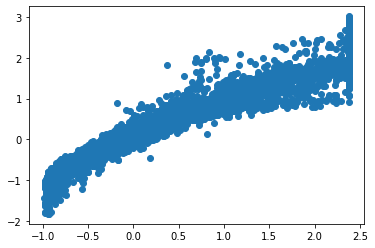

In [153]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [121]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-499.09) * Intercept + (9166.39) * carat + (-24.98) * depth + (-25.07) * table + (-1541.0) * x + (1117.22) * y + (-86.78) * z + (323.66) * cut_Ideal + (313.78) * cut_Premium + (199.92) * cut_veryGood + (-192.89) * color_E + (-270.71) * color_F + (-421.16) * color_G + (-843.24) * color_H + (-1324.11) * color_I + (-1914.3) * color_J + (4088.34) * clarity_IF + (2651.66) * clarity_SI1 + (1832.59) * clarity_SI2 + (3458.53) * clarity_VS1 + (3188.63) * clarity_VS2 + (3874.09) * clarity_VVS2 + 

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [156]:
i=0
for column in X.columns:
    if i < 22:
        print ("VIF of ",column ,"--->",  vif[i])
        i = i+1

VIF of  carat ---> 113.02189062537815
VIF of  depth ---> 1019.4694489023447
VIF of  table ---> 854.0008594512427
VIF of  x ---> 11487.685084386461
VIF of  y ---> 10764.684708298879
VIF of  z ---> 2111.226202873665
VIF of  cut_Ideal ---> 5.338249119357337
VIF of  cut_Premium ---> 3.4147015472592783
VIF of  cut_Very Good ---> 3.0330134859255384
VIF of  color_E ---> 2.479977519783567
VIF of  color_F ---> 2.4460997285213324
VIF of  color_G ---> 2.793431012347904
VIF of  color_H ---> 2.301399125818522
VIF of  color_I ---> 1.9280265467512527
VIF of  color_J ---> 1.5133334684806812
VIF of  clarity_IF ---> 3.58085898132166
VIF of  clarity_SI1 ---> 19.220767935556346
VIF of  clarity_SI2 ---> 13.523532021034574
VIF of  clarity_VS1 ---> 12.447451050774648
VIF of  clarity_VS2 ---> 18.004222419975655
VIF of  clarity_VVS2 ---> 13.46387319150315


## Model comparison

In [157]:
models = [('Linear Regression', linear_rsq_train,linear_rsq_test,linear_adj_rsq_train,linear_adj_rsq_test,
                                linear_rmse_train,linear_rmse_test),
          
          ('Ridge Regression', ridge_rsq_train,ridge_rsq_test,ridge_adj_rsq_train,ridge_adj_rsq_test,
                                ridge_rmse_train,ridge_rmse_test),
          ('Lasso Regression', lasso_rsq_train,lasso_rsq_test,lasso_adj_rsq_train,lasso_adj_rsq_test,
                                lasso_rmse_train,lasso_rmse_test),
          ('OLS Regression', ols_rsq_test,ols_rsq_test,ols_adj_rsq_test,ols_adj_rsq_test,
                                ols_rmse_train,ols_rmse_test)
             
         ]

In [158]:
predict = pd.DataFrame(data = models, columns=['Model','Rsquare(Train)','Rsquare(Test)','Adj_Rsquare(Train)', 'Adj_Rsquare(Test)','RMSE(Train)','RMSE(Test)' ])
predict

,Model,Rsquare(Train),Rsquare(Test),Adj_Rsquare(Train),Adj_Rsquare(Test),RMSE(Train),RMSE(Test)
0,Linear Regression,0.939855,0.941815,0.939788,0.941663,849.927518,837.979627
1,Ridge Regression,0.939855,0.941813,0.939788,0.941662,0.245067,0.241626
2,Lasso Regression,0.865852,0.872503,0.865702,0.872171,0.365998,0.357669
3,OLS Regression,0.940000,0.940000,0.940000,0.940000,0.241622,0.245067


## Visualizing Models Performance

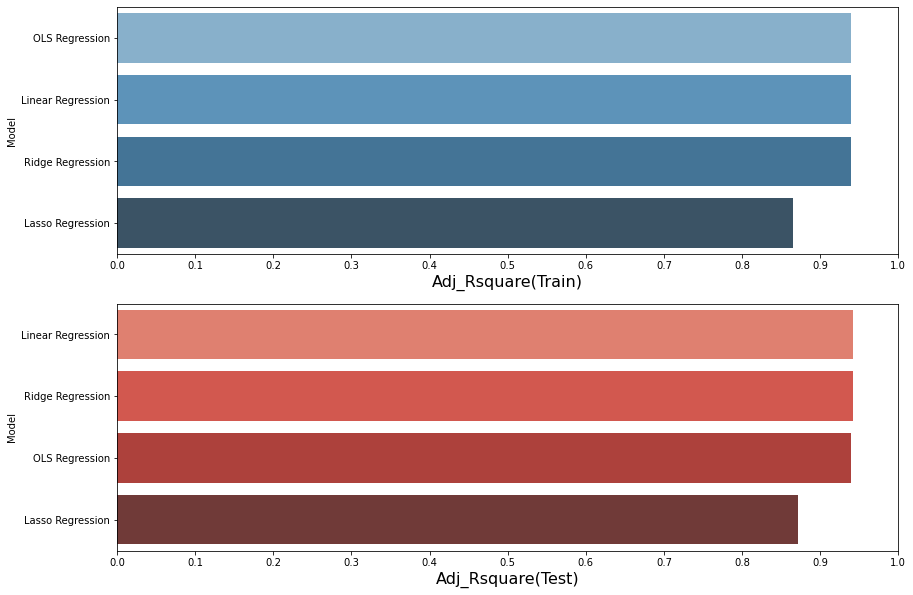

In [164]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Adj_Rsquare(Train)'], ascending=False, inplace=True)

sns.barplot(x='Adj_Rsquare(Train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Adj_Rsquare(Train)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Adj_Rsquare(Test)'], ascending=False, inplace=True)

sns.barplot(x='Adj_Rsquare(Test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Adj_Rsquare(Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

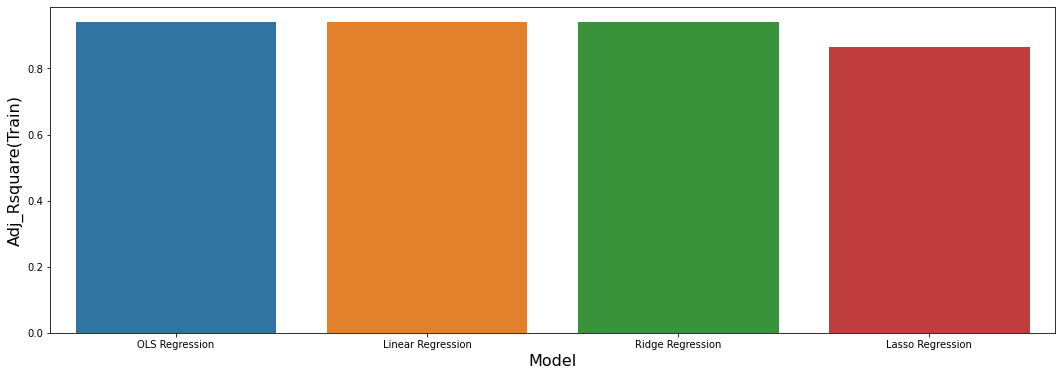

In [165]:
predict.sort_values(by=['Adj_Rsquare(Train)'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='Adj_Rsquare(Train)', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('Adj_Rsquare(Train)', size=16)

plt.show()

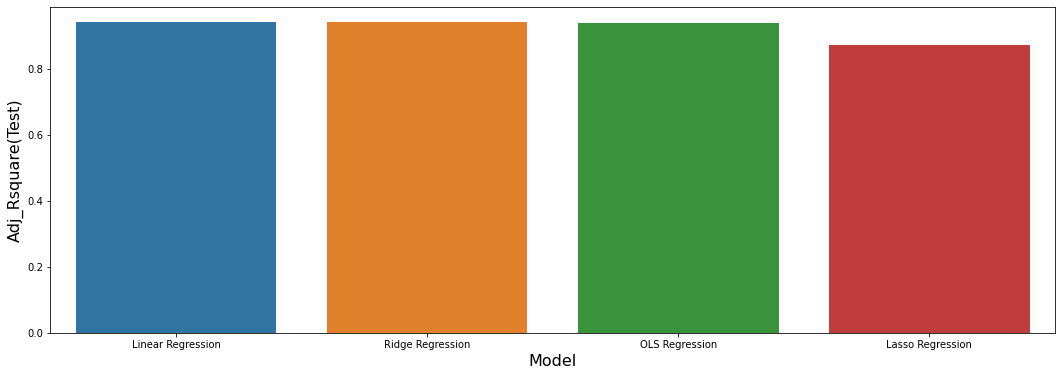

In [163]:
predict.sort_values(by=['Adj_Rsquare(Test)'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='Adj_Rsquare(Test)', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('Adj_Rsquare(Test)', size=16)

plt.show()

- Generally,the best regression model is the one that have higher adjusted and predicted R-squared values for both train and test data.Because the adjusted R squared increases only if the new variable improves the model more than would be expected  and it can also decrease with poor quality predictors.

- In regression, low p-values indicate terms that are statistically significant.It is advisable to remove the term with the high p-value(>0.05).

### It is observed that building the regression model using stats model giving best results for r squared and adjusted R square value of 0.94 both.

The final Linear Regression equation is


<b>price = b0 + b1 * carat + b2 * depth + b3 * table + b4 * x + b5 * y + b6 * z + b7 * cut_Ideal + b8 * cut_Premium + b9 * cut_veryGood + b10 * color_E + b11 * color_F + b12 * color_G + b13 * color_H + b14 * color_I + b15 * color_J + b16 * clarity_IF + b17 * clarity_SI1 + b18 * clarity_SI2 + b19 * clarity_VS1 + b20 * clarity_VS2 + b21 * clarity_VVS2 </b>

<b>price = (-499.09) * Intercept + (9166.39) * carat + (-24.98) * depth + (-25.07) * table + (-1541.0) * x + (1117.22) * y + (-86.78) * z + (323.66) * cut_Ideal + (313.78) * cut_Premium + (199.92) * cut_veryGood + (-192.89) * color_E + (-270.71) * color_F + (-421.16) * color_G + (-843.24) * color_H + (-1324.11) * color_I + (-1914.3) * color_J + (4088.34) * clarity_IF + (2651.66) * clarity_SI1 + (1832.59) * clarity_SI2 + (3458.53) * clarity_VS1 + (3188.63) * clarity_VS2 + (3874.09) * clarity_VVS2 </b>


When carat increases by 1 unit, price increases by 9166.39 units, keeping all other predictors constant.
similarly, when  cut of the of stone is Ideal increases by 1 unit, price increases by 313.7 units, keeping all other predictors constant.

There are also some negative co-efficient values, for instance, length of cubic zirconia has its corresponding co-efficient as -1541. This implies, when the length of the stone increases by 1 unit, the price decreases by 1541 units, keeping all other predictors constant.

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

## Insights

- Cubic zirconia that weighs less than a carat comes with a range of price of 326 to 5000 rupees and if the weight is in         between one and two carats, it comes with a price range of 5500 to 12000.
- The best stone cut is 'Ideal' cut but ideal cut stones have a smaller number of good colours.
- With a price of 4000 to 4500 one can get best coloured stone.
- Best clarity stone comes with an average price of 3000 to 3500.


## Recommendations

- As stone weighs greater than one carat increases good amount of price, small changes in weight can be made.
- Number of good colored stones with ideal cut should be increased as they cost more and causes ,more profit.
- As best colored stones comes under 4500 the cut should also be preffered good cuts.
- Good clarity stones are of not good colors.Hence the stones should have an optimised form of cut,color and clarity to attract more customers.